# Dynamic Pricing Strategy Using Python

Dynamic pricing is a strategy that allows businesses to adjust prices in real-time based on factors such as supply, demand, customer behavior, and market conditions. This technique is widely used in industries like ride-sharing, airlines, hospitality, and e-commerce to optimize revenue and manage operational efficiency.

In this project, we develop a dynamic pricing model inspired by ride-hailing platforms. The goal is to predict adjusted ride prices using machine learning, based on inputs such as the number of riders and drivers, customer loyalty, vehicle type, and ride characteristics.

The key steps include:
- Preprocessing and exploring the dataset
- Engineering demand and supply multipliers
- Calculating adjusted ride costs
- Training a machine learning model (Random Forest Regressor)
- Evaluating the model's performance

This notebook provides a practical walkthrough of implementing a data-driven pricing strategy using Python.

**Dataset Credits**: [Dynamic Pricing Dataset on Kaggle](https://www.kaggle.com/code/litvinenko630/ride-dynamic-pricing?select=dynamic_pricing.csv)


# Import Dataset

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [2]:
df.columns


Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the dataset and uncovering patterns, trends, and relationships. Below is a summary of the dataset being analyzed:

1. General Data Overview

In [3]:
df.shape

(1000, 10)

In [4]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [5]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
fig = px.scatter(df, x= 'Expected_Ride_Duration', y= 'Historical_Cost_of_Ride', title= 'Expected Ride Duration vs Historical Cost of Ride', trendline='ols')
fig.show()

In [8]:
fig = px.box(df, x= 'Vehicle_Type', y= 'Historical_Cost_of_Ride', title= 'Vehicle Type vs Historical Cost of Ride')
fig.show()

In [9]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [10]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [11]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()


fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'
))
fig.update_layout(title='Correlation Matrix')
fig.show()


## 2. Univariate Analysis

Univariate analysis focuses on examining each variable in isolation to understand its distribution and basic characteristics. This step helps identify data patterns, outliers, skewness, and potential issues such as missing or extreme values.

In this section:
- Numerical features are visualized using histograms and boxplots to assess their distribution and spot outliers.
- Categorical features are analyzed using bar plots to explore the frequency of each category.

This analysis provides foundational insight before moving into multivariate relationships and feature engineering.


In [12]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize= (16, 20))
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


    


<Figure size 1600x2000 with 0 Axes>

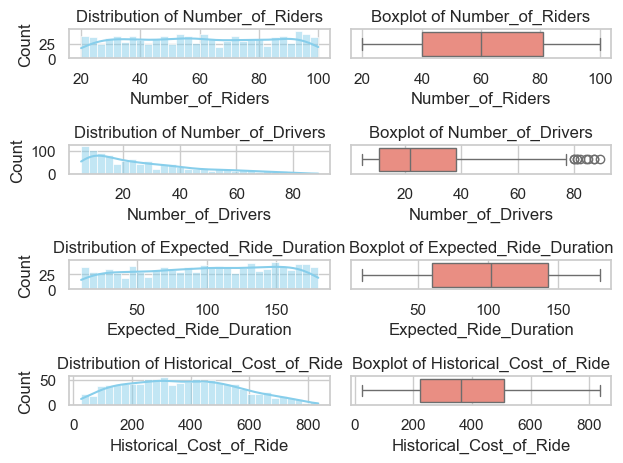

In [14]:
# Numerical Features: Histograms & Boxplots

for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 2, 2*i+1)
    sns.histplot(x= df[col], kde= True, bins=30, color= 'skyblue')
    plt.title(f'Distribution of {col}')

    plt.subplot(len(numerical_features), 2, 2*i+2)
    sns.boxplot(x= df[col], color= 'salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [15]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\1915153271.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\1915153271.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\1915153271.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




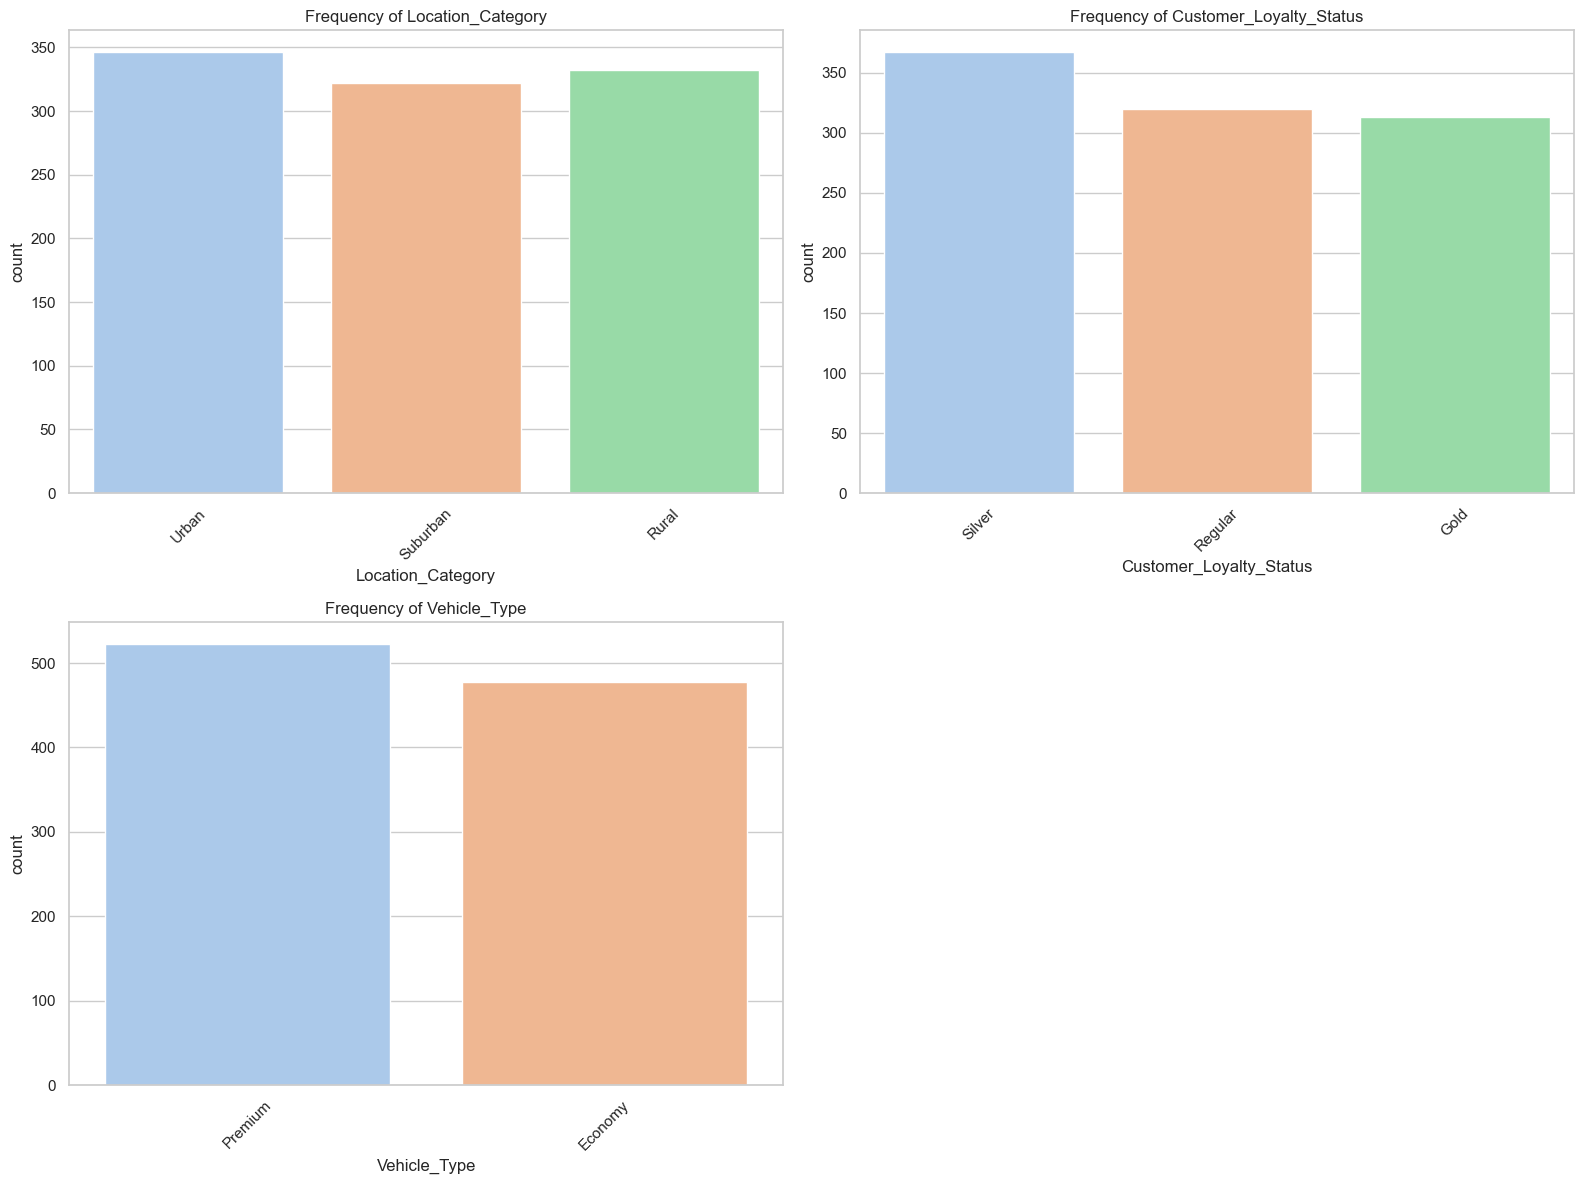

In [16]:
# Categorical Features: Bar plots
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type']
plt.figure(figsize= (16,12))
for i, col in enumerate(categorical_features):
    plt.subplot(2,2, i+1)
    sns.countplot(data=df, x=  col, palette= 'pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

Bivariate analysis involves examining the relationships between pairs of variables to understand how one feature may influence another. This step is critical for identifying potential predictors, interactions, and dependencies that could inform feature selection or model design.

In this section:
- Numerical-to-numerical relationships are explored using scatter plots and correlation.
- Numerical-to-categorical relationships are analyzed using box plots.
- This helps us assess patterns, trends, and potential correlations between features and the target variable.


In [17]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

### Scatter plots for Numberical Vs Numerical Data


In [20]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


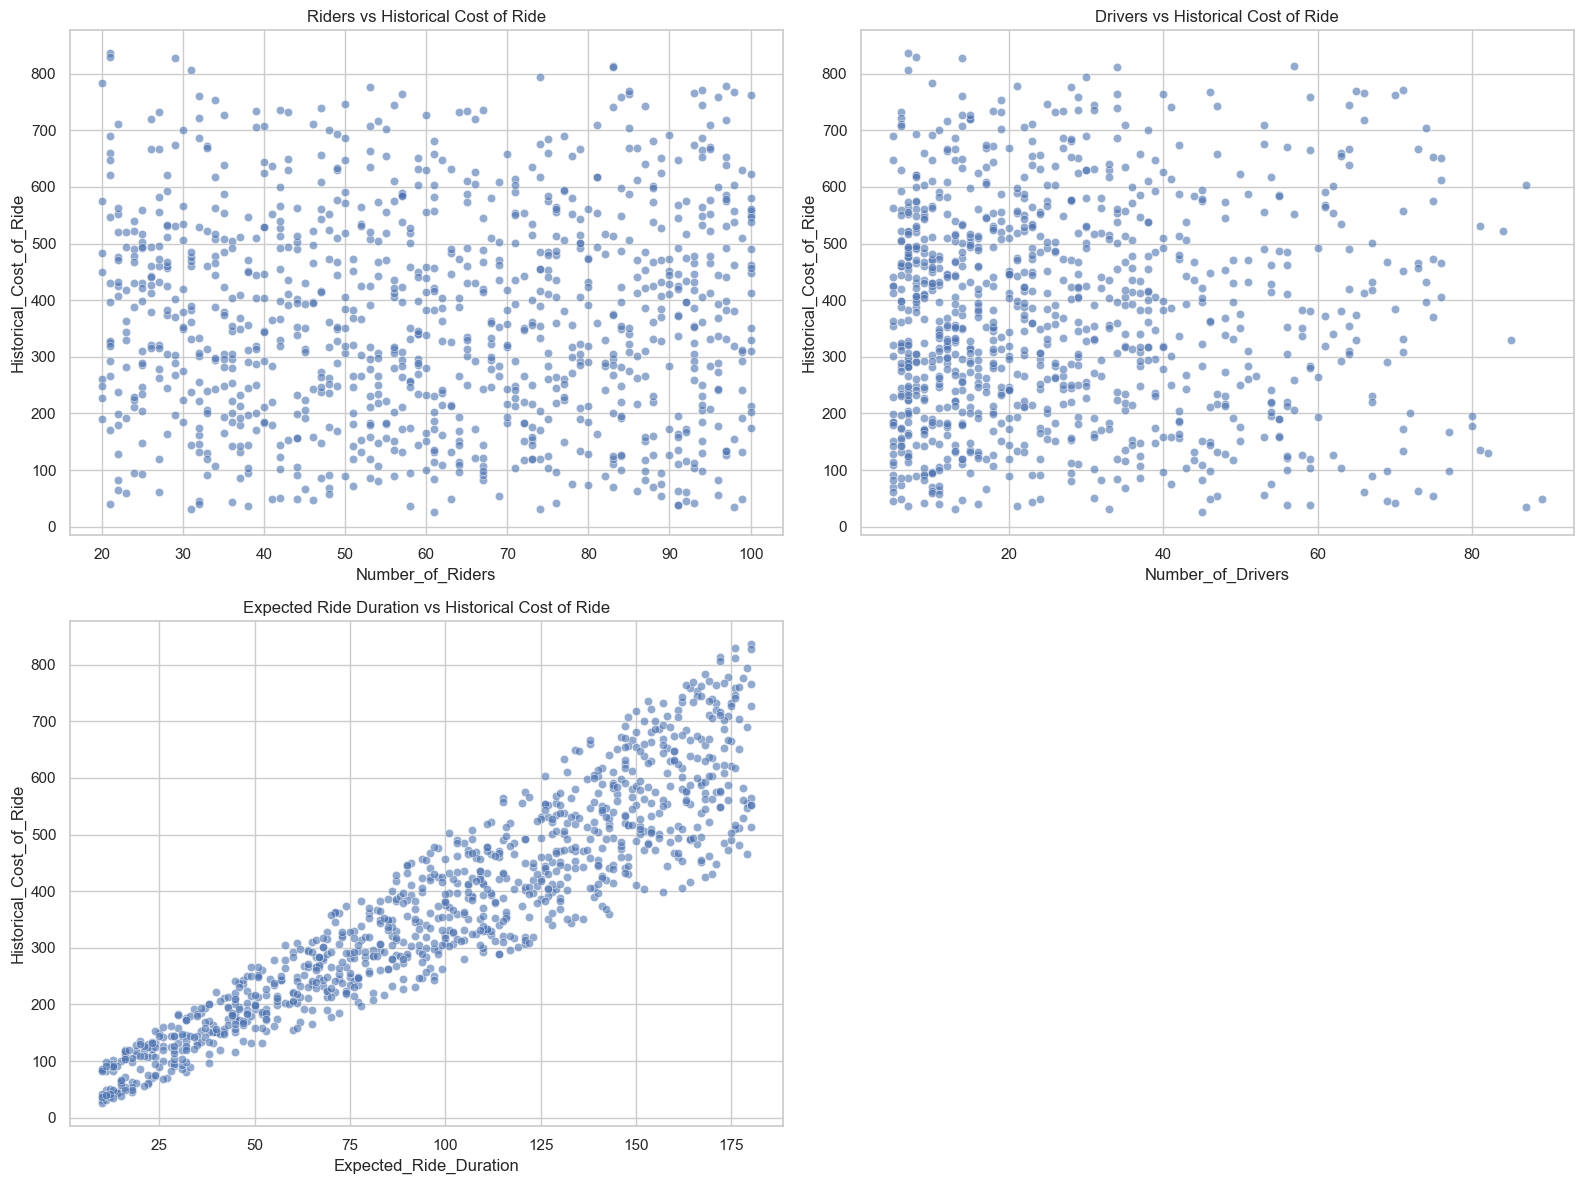

In [21]:
plt.figure(figsize= (16,12))

# Number of Rieders vs Historical Cost of Ride
plt.subplot(2, 2, 1)
sns.scatterplot(data= df, x= 'Number_of_Riders', y= 'Historical_Cost_of_Ride', alpha= 0.6)
plt.title("Riders vs Historical Cost of Ride")

# Number of Drivers vs Historical Cost of Ride
plt.subplot(2, 2, 2)
sns.scatterplot(data= df, x= 'Number_of_Drivers', y= 'Historical_Cost_of_Ride', alpha= 0.6)
plt.title("Drivers vs Historical Cost of Ride")

# Expected Ride Duration vs Historical Cost of Ride
plt.subplot(2, 2, 3)
sns.scatterplot(data= df, x= 'Expected_Ride_Duration', y= 'Historical_Cost_of_Ride', alpha= 0.6)
plt.title("Expected Ride Duration vs Historical Cost of Ride")

plt.tight_layout()
plt.show()


C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\3326624906.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\3326624906.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_4360\3326624906.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




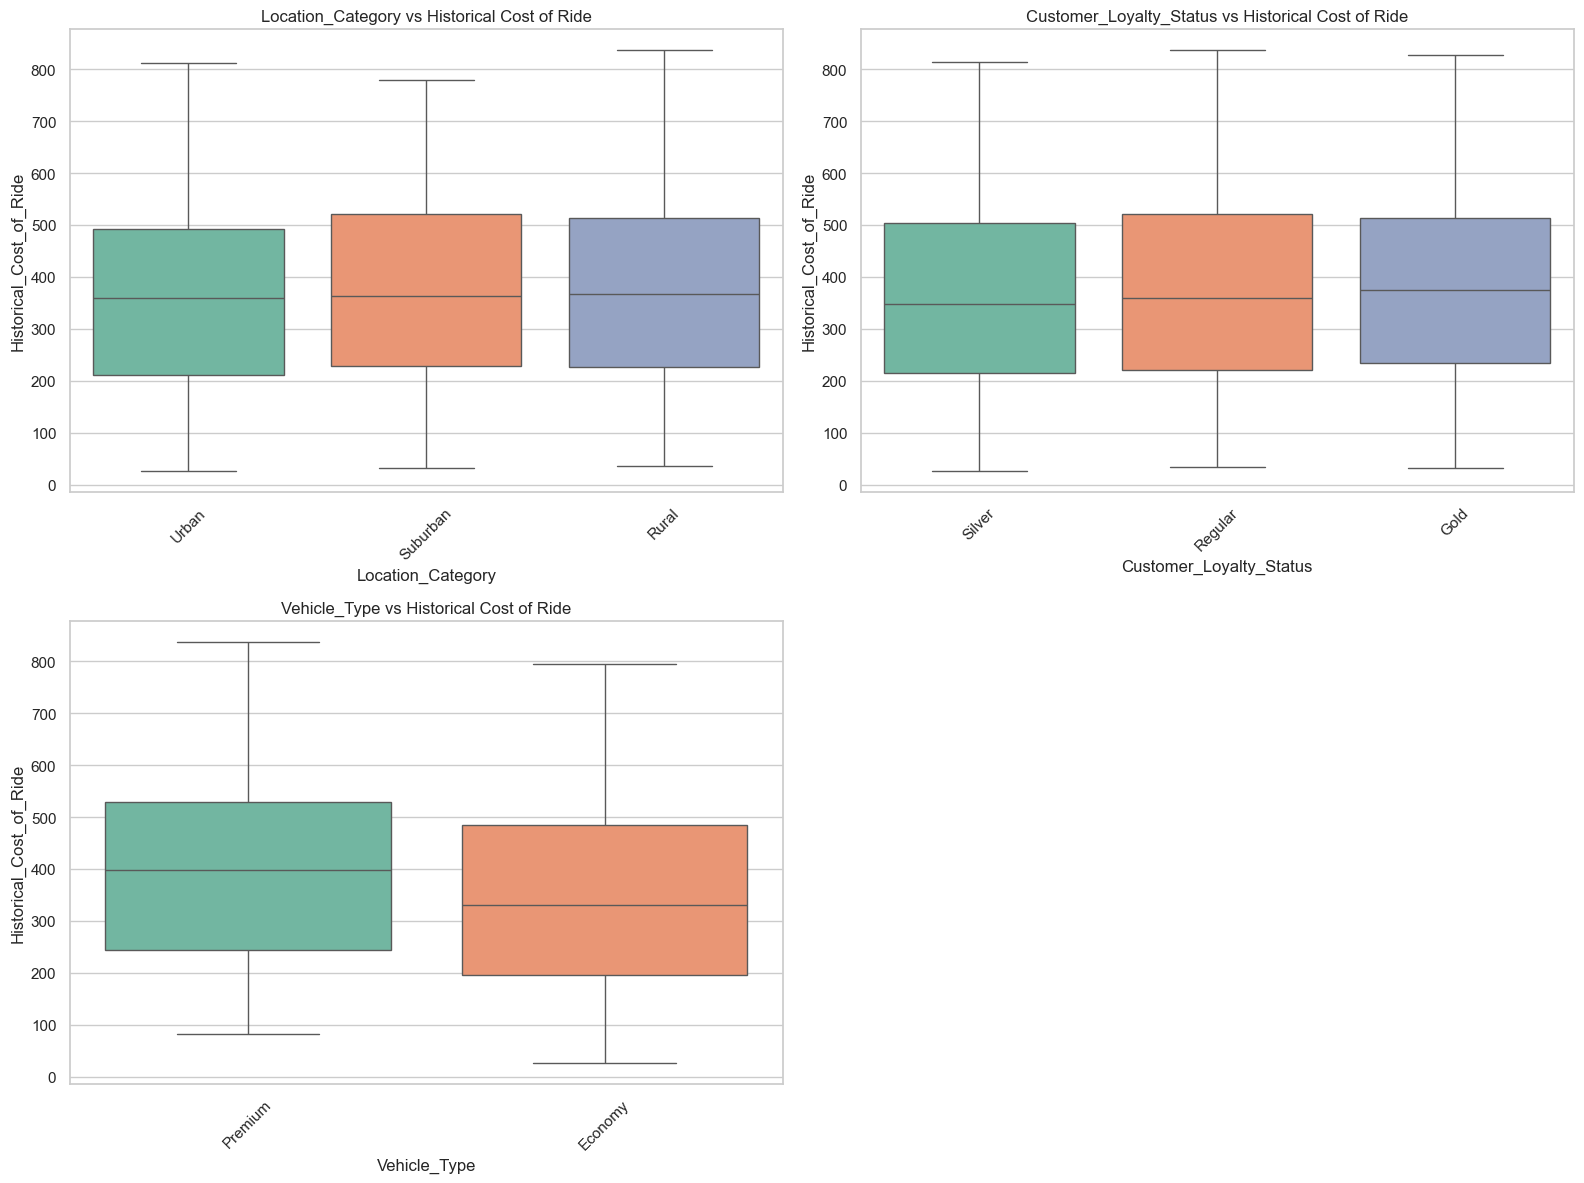

In [19]:
# Boxplots for Categorical Features vs Target
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type']

plt.figure(figsize= (16,12))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data= df, x= col, y= 'Historical_Cost_of_Ride', palette= 'Set2')
    plt.title(f'{col} vs Historical Cost of Ride')
    plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

Multivariate analysis explores interactions between three or more variables simultaneously. This helps uncover complex relationships that are not visible in univariate or bivariate analysis. By combining numerical and categorical features, we can gain deeper insights into user behavior, pricing patterns, and potential factors influencing ride cost.

In this section:
- A pairplot visualizes the relationship between multiple numerical features.
- Grouped boxplots (or violin plots) show how ride cost varies with customer loyalty and vehicle type.
- Cross-tabulation is used to explore categorical interactions such as the relationship between loyalty status and vehicle preference.


In [23]:
numerical_features

['Number_of_Riders',
 'Number_of_Drivers',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

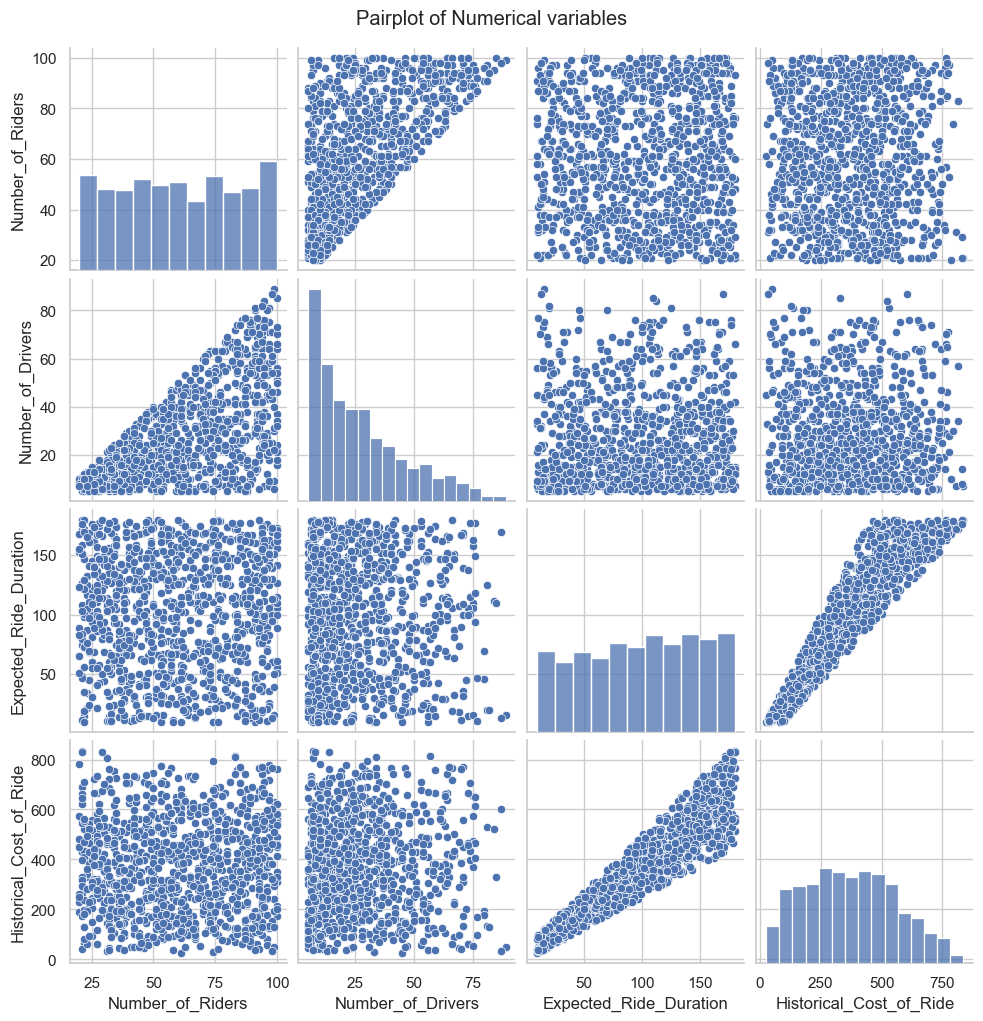

In [26]:
# Pairplot of key numerical variables
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical variables', y= 1.02)
plt.show()

In [27]:
numerical_features

['Number_of_Riders',
 'Number_of_Drivers',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

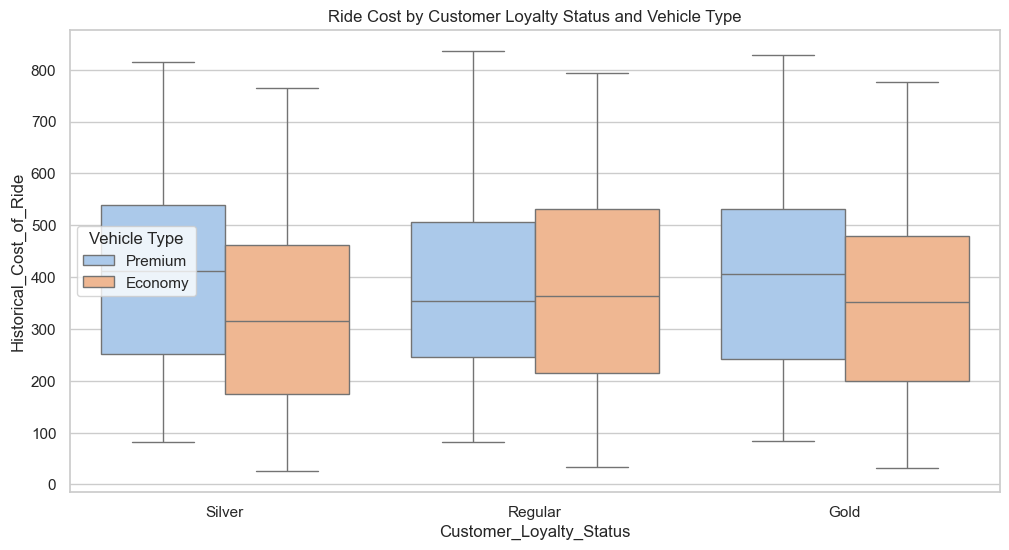

In [28]:
# Grouped bocplot: Loyalty Status vs Cost by Vehicle Type
plt.figure(figsize= (12, 6))
sns.boxplot(data= df, x= 'Customer_Loyalty_Status', y= 'Historical_Cost_of_Ride', hue= 'Vehicle_Type', palette= 'pastel')
plt.title('Ride Cost by Customer Loyalty Status and Vehicle Type')
plt.legend(title= 'Vehicle Type')
plt.show()

In [30]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [32]:
# Cross-validation of loyalty vs vehicle Type
cross_tab = pd.crosstab(df['Customer_Loyalty_Status'], df['Vehicle_Type'])
cross_tab

Vehicle_Type,Economy,Premium
Customer_Loyalty_Status,,
Gold,153,160
Regular,144,176
Silver,181,186


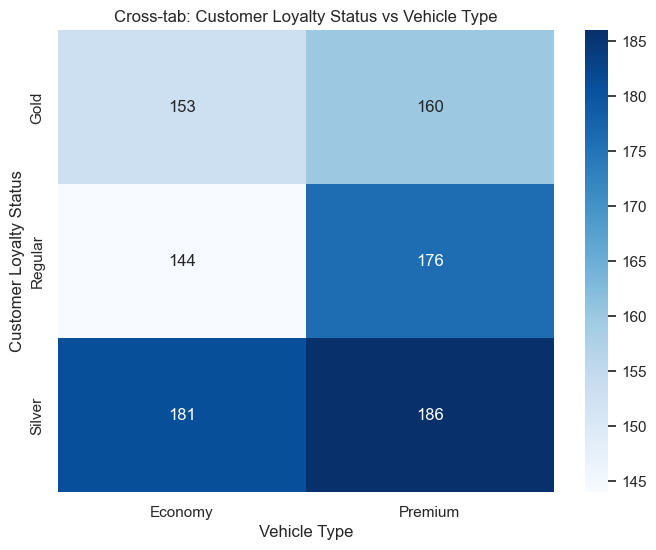

In [33]:
# Plorring the cross-tabulation
plt.figure(figsize= (8, 6))
sns.heatmap(cross_tab, annot= True, fmt= 'd', cmap= 'Blues')
plt.title('Cross-tab: Customer Loyalty Status vs Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Customer Loyalty Status')
plt.show()

## 5. Time-Based Analysis

Analyzing ride costs across different times of the day can reveal important patterns related to demand fluctuations, surge pricing, and customer behavior. To facilitate this, the `Time_of_Booking` variable will be categorized into meaningful time slots such as morning, afternoon, evening, and night.

This section:
- Converts booking times into discrete time categories.
- Examines how historical ride costs vary by these time slots.
